In [ ]:
pip install pandas

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/ratings_Electronics (1).csv',names=['userId', 'productId','Rating','timestamp'])

In [ ]:
df.head()

,userId,productId,Rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1.365811e+09
1,A2CX7LUOHB2NDG,0321732944,5.0,1.341101e+09
2,A2NWSAGRHCP8N5,0439886341,1.0,1.367194e+09
3,A2WNBOD3WNDNKT,0439886341,3.0,1.374451e+09
4,A1GI0U4ZRJA8WN,0439886341,1.0,1.334707e+09


In [ ]:
df.shape

(4890732, 4)

In [ ]:
df.dtypes

userId        object
productId     object
Rating       float64
timestamp    float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4890732 entries, 0 to 4890731
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     object 
 1   productId  object 
 2   Rating     float64
 3   timestamp  float64
dtypes: float64(2), object(2)
memory usage: 149.3+ MB


In [ ]:
df.describe()

,Rating,timestamp
count,4.890731e+06,4.890731e+06
mean,3.985058e+00,1.314347e+09
std,1.398061e+00,7.662051e+07
min,1.000000e+00,9.127296e+08
25%,3.000000e+00,1.279066e+09
50%,5.000000e+00,1.333066e+09
75%,5.000000e+00,1.370477e+09
max,5.000000e+00,1.406074e+09


In [ ]:
df['Rating'].describe().T

count    4.890731e+06
mean     3.985058e+00
std      1.398061e+00
min      1.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: Rating, dtype: float64

In [ ]:
#Find the minimum and maximum ratings
print('Minimum rating is: %d' %(df.Rating.min()))
print('Maximum rating is: %d' %(df.Rating.max()))

Minimum rating is: 1
Maximum rating is: 5


In [ ]:
#Check for missing values
print('Number of missing values across columns: \n',df.isnull().sum())

Number of missing values across columns: 
 userId       0
productId    1
Rating       1
timestamp    1
dtype: int64


In [ ]:
 pip install matplotlib

<Axes: xlabel='Rating', ylabel='Count'>

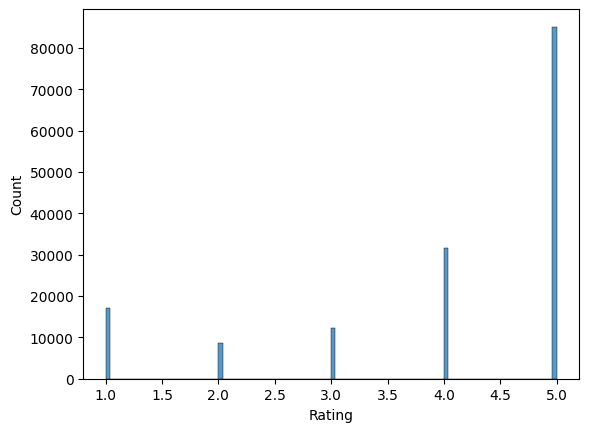

In [ ]:
# Check the distribution of the rating
import seaborn as sns
sns.histplot(data=df, x='Rating')

(array([17222.,     0.,  8649.,     0.,     0., 12328.,     0., 31580.,
            0., 85135.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

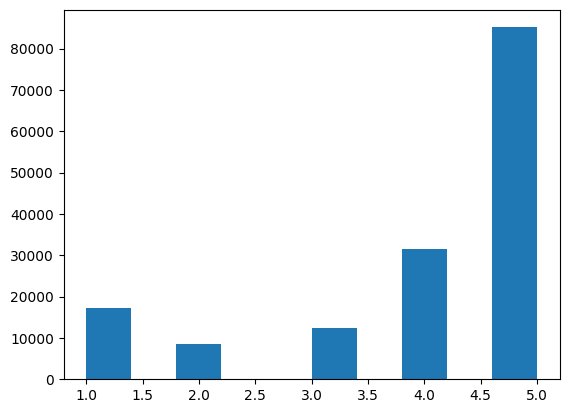

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['Rating'])

In [ ]:
print("Total data ")
print("-"*50)
print("\nTotal no of ratings :",df.shape[0])
print("Total No of Users   :", len(np.unique(df.userId)))
print("Total No of products  :", len(np.unique(df.productId)))

Total data 
--------------------------------------------------

Total no of ratings : 154914
Total No of Users   : 136639
Total No of products  : 9956


In [ ]:
#Dropping the Timestamp column

df.drop(['timestamp'], axis=1,inplace=True)

In [ ]:
# Analyse des notes utilisateurs
df_rate_product_user = df.groupby('userId')['Rating'].count().sort_values(ascending=False)
df_rate_product_user.head()

userId
A5JLAU2ARJ0BO     491
A6FIAB28IS79      393
A3OXHLG6DIBRW8    364
ADLVFFE4VBT8      298
A680RUE1FDO8B     294
Name: Rating, dtype: int64

In [ ]:
df_rate_product_user.describe()

count    2.878192e+06
mean     1.699237e+00
std      2.331939e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      4.910000e+02
Name: Rating, dtype: float64

In [ ]:
quantiles = df_rate_product_user.quantile(np.arange(0,1.01,0.01), interpolation='higher')

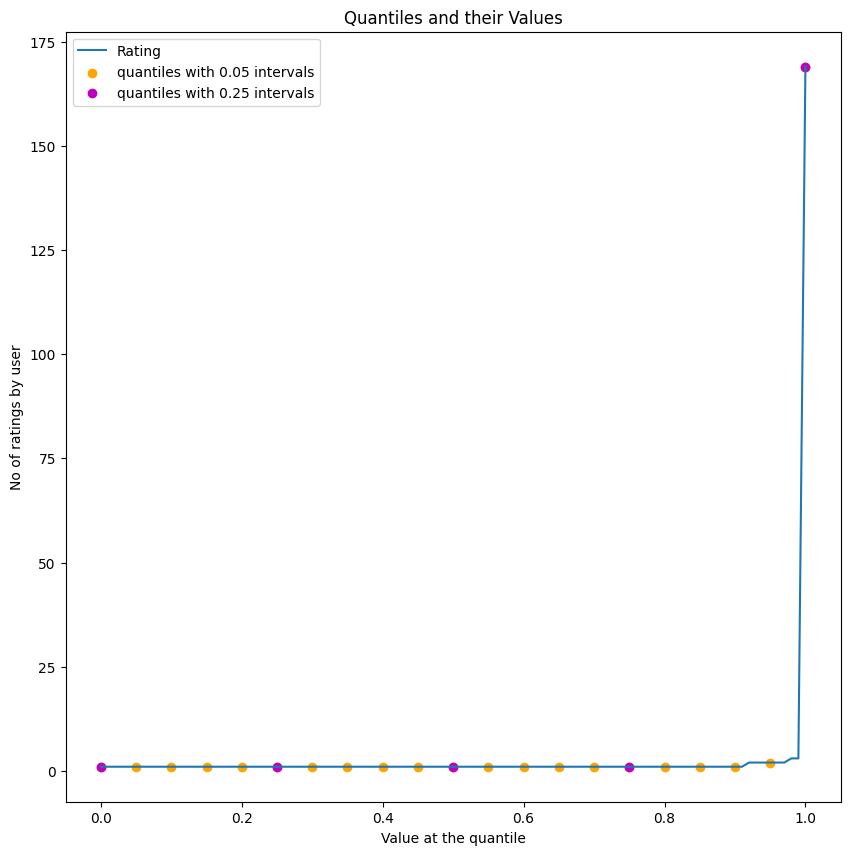

In [ ]:
plt.figure(figsize=(10,10))
plt.title("Quantiles and their Values")
quantiles.plot()
# quantiles with 0.05 difference
plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='orange', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='m', label = "quantiles with 0.25 intervals")
plt.ylabel('No of ratings by user')
plt.xlabel('Value at the quantile')
plt.legend(loc='best')
plt.show()

In [ ]:
#Getting the new dataframe which contains users who has given 50 or more ratings

new_df=df.groupby("productId").filter(lambda x:x['Rating'].count() >=50)

In [ ]:
print('Number of rated product more than 50 per user : {}\n'.format(sum(df_rate_product_user >= 50)) )

Number of rated product more than 50 per user : 3



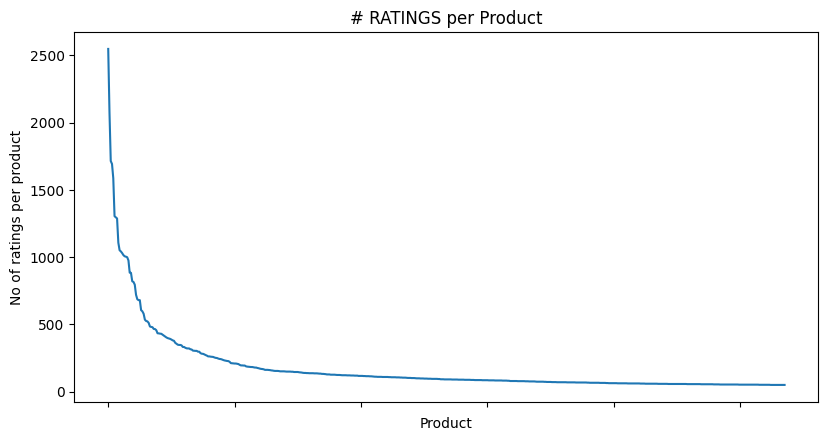

In [ ]:
no_of_ratings_per_product = new_df.groupby(by='productId')['Rating'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_product.values)
plt.title('# RATINGS per Product')
plt.xlabel('Product')
plt.ylabel('No of ratings per product')
ax.set_xticklabels([])

plt.show()

In [ ]:
#Average rating of the product

new_df.groupby('productId')['Rating'].mean().head()

productId
0972683275    4.470980
1400501466    3.560000
1400501520    4.243902
1400501776    3.884892
1400532620    3.684211
Name: Rating, dtype: float64

In [ ]:
new_df.groupby('productId')['Rating'].mean().sort_values(ascending=False).head()

productId
B000053HC5    4.945783
B00005LE76    4.879310
B00005UKBD    4.858974
B000053HH5    4.841499
B00004TDLD    4.840517
Name: Rating, dtype: float64

In [ ]:
#Total no of rating for product

new_df.groupby('productId')['Rating'].count().sort_values(ascending=False).head()

productId
B0019EHU8G    12285
B003ELYQGG    11617
B003ES5ZUU    10276
B0002L5R78     9487
B003LR7ME6     8840
Name: Rating, dtype: int64

In [ ]:
ratings_mean_count = pd.DataFrame(new_df.groupby('productId')['Rating'].mean())

In [ ]:
ratings_mean_count['rating_counts'] = pd.DataFrame(new_df.groupby('productId')['Rating'].count())

In [ ]:
ratings_mean_count.head()

,Rating,rating_counts
productId,,
0972683275,4.470980,1051
1400501466,3.560000,250
1400501520,4.243902,82
1400501776,3.884892,139
1400532620,3.684211,171


In [ ]:
ratings_mean_count['rating_counts'].max()

2547

<Axes: >

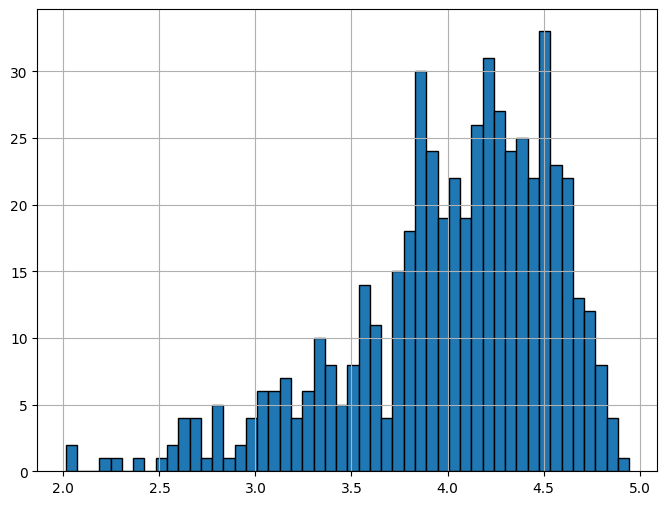

In [ ]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['Rating'].hist(bins=50)

In [ ]:
pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=2811596 sha256=c4f3c87c4d9c76d585f970891f96932579bef11460c28bd1a3f75dbd948117b5
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


<Axes: xlabel='productId'>

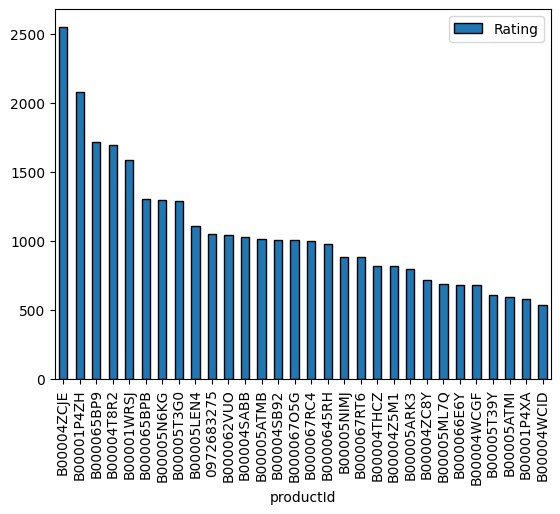

In [ ]:
popular_products = pd.DataFrame(df.groupby('productId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(30).plot(kind = "bar")

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity

# Chargement des données depuis un fichier CSV
data = pd.read_csv('donnees_commerce_electronique.csv')

# Diviser les données en jeux d'entraînement et de test
train_data, test_data = train_test_split(data, test_size=0.2)

# Créer une matrice utilisateur-article pour représenter les interactions utilisateur-article
def create_user_item_matrix(data):
    num_users = data['user_id'].nunique()
    num_articles = data['article_id'].nunique()

    user_item_matrix = pd.DataFrame(np.zeros((num_users, num_articles)), index=data['user_id'].unique(), columns=data['article_id'].unique())

    for row in data.itertuples():
        user_index = row[1]
        article_index = row[2]
        rating = row[3]

        user_item_matrix.loc[user_index, article_index] = rating

    return user_item_matrix

train_matrix = create_user_item_matrix(train_data)

# Calculer la similarité entre les utilisateurs en utilisant la similarité cosinus
user_similarity = cosine_similarity(train_matrix.fillna(0))

# Prédire les évaluations manquantes en utilisant la moyenne pondérée des évaluations des utilisateurs similaires
def predict_ratings(user_similarity, user_item_matrix):
    user_similarity[user_similarity < 0] = 0  # Ignorer les valeurs négatives (autocorrélations)
    user_ratings_pred = np.dot(user_similarity, user_item_matrix.fillna(0))
    user_ratings_pred_sum = np.abs(user_similarity).sum(axis=1)
    user_ratings_pred[user_ratings_pred_sum != 0] /= user_ratings_pred_sum[user_ratings_pred_sum != 0]

    return user_ratings_pred

# Obtenir les prédictions sur l'ensemble de test
predicted_ratings = predict_ratings(user_similarity, train_matrix)

# Évaluation du modèle en utilisant la racine carrée de l'erreur quadratique moyenne (RMSE)
def calculate_rmse(actual, predicted):
    non_zero_indices = actual.notnull()
    actual_values = actual[non_zero_indices]
    predicted_values = predicted[non_zero_indices]
    rmse = np.sqrt(((actual_values - predicted_values) ** 2).mean())
    return rmse

test_rmse = calculate_rmse(test_matrix, predicted_ratings)

print(f"RMSE sur l'ensemble de test : {test_rmse}")


# Filtrage Collaboratif et k-plus proches voisins

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity

# Chargement des données depuis un fichier CSV
data = pd.read_csv('/content/ratings_Electronics (1).csv',names=['userId', 'productId','Rating','timestamp'])

In [ ]:
data.columns

Index(['userId', 'productId', 'Rating', 'timestamp'], dtype='object')

In [ ]:
data.drop(['timestamp'], axis=1,inplace=True)

In [ ]:
pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=2811595 sha256=ff2427ce51ce413e5e44d2b9056aff4450f51f38cfde3baf1c8a7fbb2c9fcce7
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
import os
from surprise.model_selection import train_test_split

In [ ]:
from sklearn.decomposition import TruncatedSVD

In [ ]:
#Reading the dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(data,reader)

In [ ]:
data

In [ ]:
#Splitting the dataset
trainset, testset = train_test_split(data, test_size=0.3,random_state=10)

In [ ]:
# Créer le modèle TruncatedSVD
model = TruncatedSVD(n_components=100)

In [ ]:
# Collecte des prédictions et des évaluations réelles
predicted_ratings = [prediction.est for prediction in predictions]
true_ratings = [prediction.r_ui for prediction in predictions]

NameError: ignored

In [ ]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [ ]:
# run the trained model against the testset
test_pred = algo.test(testset)

In [ ]:
test_pred

[Prediction(uid='A3KMXJBQ5URG73', iid='1400532655', r_ui=5.0, est=5, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A3IQGFB959IR4P', iid='0528881469', r_ui=1.0, est=5, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A2L3ZOXJL8OR9G', iid='B00000K3RI', r_ui=1.0, est=5, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A36T635E6URJOY', iid='B00000J6WY', r_ui=1.0, est=5, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A2B9C7AQDPE04Z', iid='B00000K5DS', r_ui=1.0, est=5, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A3FFW39219ZAKC', iid='B00001OWYM', r_ui=1.0, est=5, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A2IOPL6BQON6UA', iid='B00000JYLO', r_ui=2.0, est=5, details={'was_impossible': True, 'reason': 'User and/or

In [ ]:
# Collecte des prédictions et des évaluations réelles
predicted_ratings = [prediction.est for prediction in test_pred]
true_ratings = [prediction.r_ui for prediction in test_pred]

In [ ]:
predicted_ratings[1:11]

[5, 5, 5, 5, 5, 5, 5, 5, 3.1818181818181817, 5]

In [ ]:
true_ratings[1:11]

[1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 5.0, 5.0, 5.0, 3.0]

In [ ]:
# Créer la matrice de confusion
confusion_matrix = {'TP': 0, 'FP': 0, 'TN': 0, 'FN': 0}

In [ ]:

for prediction in test_pred:
    true_rating = prediction.r_ui
    estimated_rating = prediction.est

    if true_rating >= 4 and estimated_rating >= 4:
        confusion_matrix['TP'] += 1
    elif true_rating < 4 and estimated_rating >= 4:
        confusion_matrix['FP'] += 1
    elif true_rating < 4 and estimated_rating < 4:
        confusion_matrix['TN'] += 1
    elif true_rating >= 4 and estimated_rating < 4:
        confusion_matrix['FN'] += 1

# Afficher la matrice de confusion
print("Matrice de Confusion:")
print(confusion_matrix)

Matrice de Confusion:
{'TP': 5597, 'FP': 1970, 'TN': 51, 'FN': 137}


In [ ]:
# Convertir les évaluations en binaire (positif ou négatif)
true_binary_ratings = [1 if rating >= 4 else 0 for rating in true_ratings]
predicted_binary_ratings = [1 if rating >= 4 else 0 for rating in predicted_ratings]

In [ ]:
# Calcul de la précision et du rappel
from sklearn.metrics import precision_score, recall_score
precision = precision_score(true_binary_ratings, predicted_binary_ratings)
recall = recall_score(true_binary_ratings, predicted_binary_ratings)

In [ ]:
print(f"Précision : {precision}")
print(f"Rappel : {recall}")

Précision : 0.7396590458570107
Rappel : 0.9761074293686781


In [ ]:
# Calcul du score F1
from sklearn.metrics import f1_score
f1 = f1_score(true_binary_ratings, predicted_binary_ratings)

In [ ]:
print(f"Score F1 : {f1}")

Score F1 : 0.8415908578302383


In [ ]:
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

Item-based Model : Test Set
RMSE: 1.3955


1.395497835295363

In [ ]:
# Chargement des données depuis un fichier CSV
data = pd.read_csv('/content/ratings_Electronics (1).csv',names=['userId', 'productId','Rating','timestamp'])

In [ ]:
# Charger les données
reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1)
data = Dataset.load_from_file('/content/ratings_Electronics (1).csv', reader=reader)

In [ ]:
trainset, testset = train_test_split(data, test_size=0.2)

In [ ]:
# Créer le modèle TruncatedSVD
model = TruncatedSVD(n_components=100)

AttributeError: ignored

In [ ]:
# Entraîner le modèle
trainset = model.fit(trainset)

ValueError: ignored

# filtrage collaboratif basé sur le contenu

In [ ]:
new_df1=new_df.head(10000)
ratings_matrix = new_df1.pivot_table(values='Rating', index='userId', columns='productId', fill_value=0)
ratings_matrix.head()

productId,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400532736,1400599997,1400698987,...,B00000JFMK,B00000JHWX,B00000JI4F,B00000JII6,B00000JMUG,B00000JPPI,B00000JSGF,B00000JYLO,B00000JYWQ,B00000K135
userId,,,,,,,,,,,,,,,,,,,,,
A01852072Z7B68UHLI5UG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0266076X6KPZ6CCHGVS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0293130VTX2ZXA70JQS,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A030530627MK66BD8V4LN,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0571176384K8RBNKGF8O,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
ratings_matrix.shape

(9832, 76)

In [ ]:
X = ratings_matrix.T
X.head()

userId,A01852072Z7B68UHLI5UG,A0266076X6KPZ6CCHGVS,A0293130VTX2ZXA70JQS,A030530627MK66BD8V4LN,A0571176384K8RBNKGF8O,A0590501PZ7HOWJKBGQ4,A0641581307AKT5MAOU0Q,A076219533YHEV2LJO988,A0821988FXKFYX53V4QG,A099626739FNCRNHIKBCG,...,AZWOPBY75SGAM,AZX0ZDVAFMN78,AZX5LAN9JEAFF,AZX7I110AF0W2,AZXKUK895VGSM,AZXP46IB63PU8,AZYTSU42BZ7TP,AZZGJ2KMWB7R,AZZMV5VT9W7Y8,AZZST8OYL5P4Q
productId,,,,,,,,,,,,,,,,,,,,,
0972683275,0,0,5,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400501466,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400501520,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
1400501776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1400532620,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X.shape

(76, 9832)

In [ ]:
X1 = X

In [ ]:
#Decomposing the Matrix basé sur le contenu
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=100)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(76, 76)

In [ ]:
# Prédire les évaluations sur l'ensemble de test
decomposed_matrix.fit()

AttributeError: ignored

In [ ]:
#Correlation Matrix

correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(76, 76)

In [ ]:
X.index[75]

'B00000K135'

In [ ]:
i = "B00000K135"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

75

In [ ]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(76,)

In [ ]:
Recommend = list(X.index[correlation_product_ID > 0.65])

# Removes the item already bought by the customer
Recommend.remove(i)

Recommend[0:24]

['1400532620',
 '9573212919',
 '9625993428',
 '9983891212',
 '9984984354',
 '9985511476',
 'B000001OM4',
 'B00000J05A',
 'B00000J0D2',
 'B00000J0D5',
 'B00000J0D8',
 'B00000J1EQ',
 'B00000J1F3',
 'B00000J1QK',
 'B00000J3UJ',
 'B00000JDHV',
 'B00000JFIF',
 'B00000JHWX',
 'B00000JSGF',
 'B00000JYWQ']

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

# Charger les données depuis le fichier CSV
data = pd.read_csv('/content/ratings_Electronics (1).csv',names=['userId', 'productId','Rating','timestamp'])

# Créer une matrice article-caractéristiques (utilisez vos propres attributs)
vectorizer = CountVectorizer()
article_features_matrix = vectorizer.fit_transform(data).toarray()

# Calculer la similarité cosinus entre les articles
article_similarity = cosine_similarity(article_features_matrix)

# Fonction de recommandation basée sur le contenu
def content_based_recommendation(article_id, num_recommendations=5):
    article_index = data[data['productId'] == article_id].index
    similar_articles = sorted(list(enumerate(article_similarity[article_index])), key=lambda x: x[1], reverse=True)
    recommended_indices = [index for index, _ in similar_articles[1:num_recommendations+1]]
    recommended_articles = data.iloc[recommended_indices]['productId']
    return recommended_articles

# Exemple d'utilisation
article_id = 'B00000K135'  # Remplacez par l'ID de l'article d'intérêt
recommended_articles = content_based_recommendation(article_id)

print(f"Articles recommandés pour l'article {article_id}:")
print(recommended_articles)


IndexError: ignored

In [ ]:
data.head()

,userId,productId,Rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


# filtrage collaboratif basé sur la factorisation matricielle